# Recommendation System

## Obtain the movie lens dataset from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip It contains 100,000 ratings applied to 9,000 movies by 600 users. Refer the readme file in the dataset.

## Task 1: Read the dataset files and load them in appropriate data structure and display top-5 rows in each of them ( 2 marks )

In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

In [2]:
linkDF = pd.read_csv('ml-latest-small/links.csv')
moviesDF = pd.read_csv('ml-latest-small/movies.csv')
ratingsDF = pd.read_csv('ml-latest-small/ratings.csv')
tagsDF = pd.read_csv('ml-latest-small/tags.csv')

In [3]:
linkDF.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [4]:
moviesDF.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
ratingsDF.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [6]:
tagsDF.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [7]:
print(linkDF.shape, moviesDF.shape, ratingsDF.shape, tagsDF.shape)

(9742, 3) (9742, 3) (100836, 4) (3683, 4)


In [8]:
mergedDF = pd.merge(ratingsDF, moviesDF, on='movieId')
mergedDF.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [9]:
mergedDF.drop('timestamp', axis=1, inplace=True)
mergedDF.head()

userId  movieId  rating             title  \
0       1        1     4.0  Toy Story (1995)   
1       5        1     4.0  Toy Story (1995)   
2       7        1     4.5  Toy Story (1995)   
3      15        1     2.5  Toy Story (1995)   
4      17        1     4.5  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

In [10]:
groupedDF = mergedDF.groupby('userId')['rating'].mean()
groupedDF.sort_values(ascending=False, inplace=True)
groupedDF = groupedDF.to_frame().reset_index()
groupedDF.head()

userId    rating
0      53  5.000000
1     251  4.869565
2     515  4.846154
3      25  4.807692
4      30  4.735294

In [11]:
groupedDF.quantile(q=0.3)

userId    183.700000
rating      3.417892
Name: 0.3, dtype: float64

In [12]:
np.percentile(groupedDF.rating.to_numpy(), 30)

3.417892365761597

In [13]:
groupedDF.iloc[-184]

userId    34.000000
rating     3.418605
Name: 426, dtype: float64

## Task 2: Print CDF plot of average ratings given by users. X-axis is value of average ratings, and Y-axis is the cumulative frequency ( 2 marks )

In [14]:
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    plt.rcParams['figure.figsize'] = [16, 9]
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

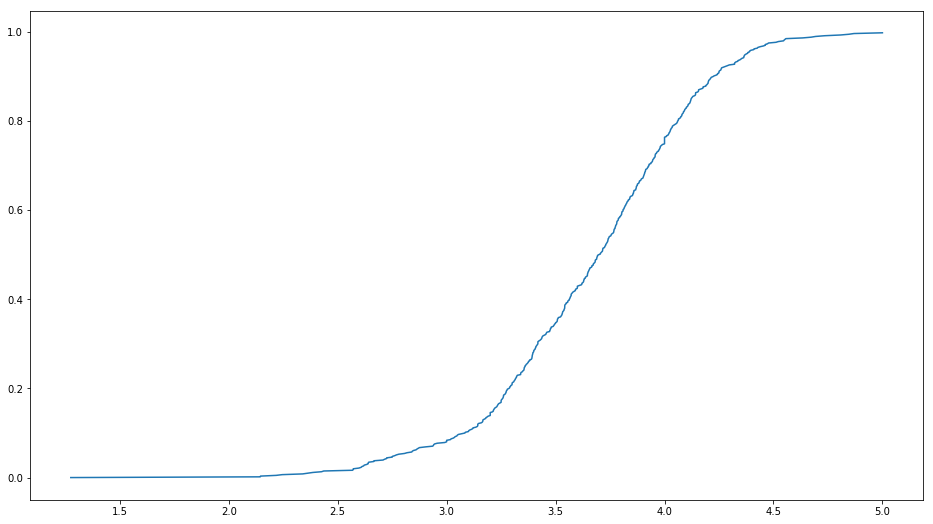

In [15]:
cdf(groupedDF.rating)

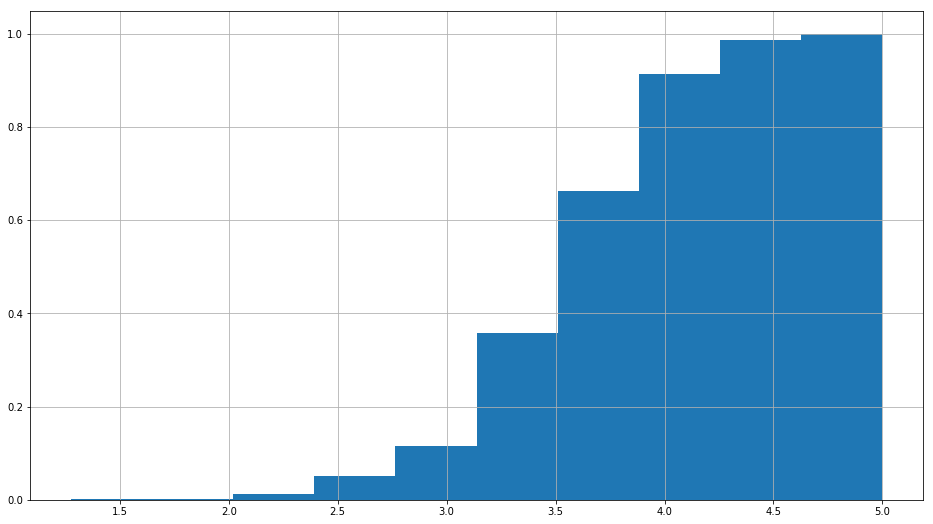

In [16]:
groupedDF.rating.hist(cumulative=True, density=1)

## Task 3: Arrange users in increasing order of the average ratings they have given. Select a user (X1) at 30 percentile and print the movies and corresponding movies ratings given by X1 ( 2 marks )

In [17]:
X1 = groupedDF.iloc[-184]
X1

userId    34.000000
rating     3.418605
Name: 426, dtype: float64

In [18]:
mergedDF[mergedDF['userId'] == X1.userId]

userId  movieId  rating  \
779        34       70     3.5   
865        34      110     0.5   
1149       34      163     3.0   
2446       34      356     4.0   
5352       34      780     3.0   
...       ...      ...     ...   
75295      34    27193     4.5   
75299      34    27728     3.0   
75302      34    27801     5.0   
75314      34    31184     3.0   
75317      34    44974     4.5   

                                                   title  \
779                           From Dusk Till Dawn (1996)   
865                                    Braveheart (1995)   
1149                                    Desperado (1995)   
2446                                 Forrest Gump (1994)   
5352                Independence Day (a.k.a. ID4) (1996)   
...                                                  ...   
75295                                      Taxi 2 (2000)   
75299  Ghost in the Shell 2: Innocence (a.k.a. Innoce...   
75302         Ong-Bak: The Thai Warrior (Ong Bak) (2003)   
75314                     Appleseed (Appurushîdo) (2004)   
75317                                  Hard Candy (2005)   

                                       genres  
779             Action|Comedy|Horror|Thriller  
865                          Action|Drama|War  
1149                   Action|Romance|Western  
2446                 Comedy|Drama|Romance|War  
5352         Action|Adventure|Sci-Fi|Thriller  
...                                       ...  
75295                           Action|Comedy  
75299  Action|Animation|Drama|Sci-Fi|Thriller  
75302                         Action|Thriller  
75314         Action|Animation|Fantasy|Sci-Fi  
75317                          Drama|Thriller  

[86 rows x 5 columns]

# Task 4: Find top-5 users "similar" to this user (X1) based on movie ratings. Clearly mention (in comments) your criteria to compute similarity. ( 4 marks )

## User-based Collaborative Filtering using N Nearest Neighbors

* The method identifies users that are similar to the queried user and estimate the desired rating to be the weighted average of the ratings of these similar users.

* In this case our score is equal to the sum of the ratings that each user gave to that item subtracting the average rating of that user multiplied with some weight which is of how much this user is similar or supposed to contribute to the predictions of other user. This is weight between user u and v. The score ranges between 0 to 1 where 0 is low and 1 is high. 

*  The fact that people rate often on very different scales. Someone may be positive and optimistic user where he will rate the movie he liked as 4 out of 5 but some other user who is less optimistic or has some high standards may rate his favorite movie as 2 out of 5. Here his 2 is first user's 4. The tweaks to make it better is, we can increase the efficiency of the Weighatge based algorithm if we normalize user’s rating.

### I have used Cosine Similarity and see how similar the users are. 
It is usually calculated over the ratings that both the users have rated in the past. 

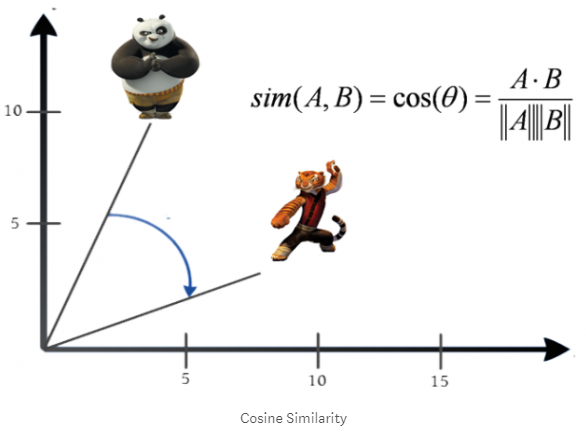

#### First creating a Normalized rating for users

In [19]:
Mean = ratingsDF.groupby(by="userId",as_index=False)['rating'].mean()
Rating_avg = pd.merge(ratingsDF,Mean,on='userId')
Rating_avg['adg_rating'] = Rating_avg['rating_x'] - Rating_avg['rating_y']
Rating_avg.head()

userId  movieId  rating_x  timestamp  rating_y  adg_rating
0       1        1       4.0  964982703  4.366379   -0.366379
1       1        3       4.0  964981247  4.366379   -0.366379
2       1        6       4.0  964982224  4.366379   -0.366379
3       1       47       5.0  964983815  4.366379    0.633621
4       1       50       5.0  964982931  4.366379    0.633621

In [20]:
Mean.head()

userId    rating
0       1  4.366379
1       2  3.948276
2       3  2.435897
3       4  3.555556
4       5  3.636364

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

#### Creating Pivot Table from the adjusted rating dataframe

In [22]:
final=pd.pivot_table(Rating_avg,values='adg_rating',index='userId',columns='movieId')
final.head()

movieId    1       2         3       4       5         6       7       8       \
userId                                                                          
1       -0.366379     NaN -0.366379     NaN     NaN -0.366379     NaN     NaN   
2             NaN     NaN       NaN     NaN     NaN       NaN     NaN     NaN   
3             NaN     NaN       NaN     NaN     NaN       NaN     NaN     NaN   
4             NaN     NaN       NaN     NaN     NaN       NaN     NaN     NaN   
5        0.363636     NaN       NaN     NaN     NaN       NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  193583  193585  193587  193609  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 9724 columns]

###  This contains some lots of NaN value since every user has not seen all the movies and that’s the reason this type of matrix is called sparse matrix. So will deal with them in following manner - 

* Use the user average over the row.
* Use the movie average over the column.

In [23]:
final_movie = final.fillna(final.mean(axis=0))
final_movie.head()

movieId    1         2         3         4         5         6         7       \
userId                                                                          
1       -0.366379 -0.053158 -0.366379 -1.096045 -0.522626 -0.366379 -0.400728   
2        0.312167 -0.053158 -0.234798 -1.096045 -0.522626  0.378461 -0.400728   
3        0.312167 -0.053158 -0.234798 -1.096045 -0.522626  0.378461 -0.400728   
4        0.312167 -0.053158 -0.234798 -1.096045 -0.522626  0.378461 -0.400728   
5        0.363636 -0.053158 -0.234798 -1.096045 -0.522626  0.378461 -0.400728   

movieId    8         9         10      ...    193565    193567    193571  \
userId                                 ...                                 
1       -0.625024 -0.455446 -0.056326  ... -0.205224 -0.705224  0.294776   
2       -0.625024 -0.455446 -0.056326  ... -0.205224 -0.705224  0.294776   
3       -0.625024 -0.455446 -0.056326  ... -0.205224 -0.705224  0.294776   
4       -0.625024 -0.455446 -0.056326  ... -0.205224 -0.705224  0.294776   
5       -0.625024 -0.455446 -0.056326  ... -0.205224 -0.705224  0.294776   

movieId    193573    193579    193581    193583    193585    193587    193609  
userId                                                                         
1        0.294776 -0.205224  0.294776 -0.205224 -0.205224 -0.205224  0.372024  
2        0.294776 -0.205224  0.294776 -0.205224 -0.205224 -0.205224  0.372024  
3        0.294776 -0.205224  0.294776 -0.205224 -0.205224 -0.205224  0.372024  
4        0.294776 -0.205224  0.294776 -0.205224 -0.205224 -0.205224  0.372024  
5        0.294776 -0.205224  0.294776 -0.205224 -0.205224 -0.205224  0.372024  

[5 rows x 9724 columns]

In [24]:
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
final_user.head()

movieId        1             2             3             4             5       \
userId                                                                          
1       -3.663793e-01  1.837611e-16 -3.663793e-01  1.837611e-16  1.837611e-16   
2        2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16   
3        1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16   
4        2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16   
5        3.636364e-01  1.110223e-16  1.110223e-16  1.110223e-16  1.110223e-16   

movieId        6             7             8             9             10      \
userId                                                                          
1       -3.663793e-01  1.837611e-16  1.837611e-16  1.837611e-16  1.837611e-16   
2        2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16   
3        1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16   
4        2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16   
5        1.110223e-16  1.110223e-16  1.110223e-16  1.110223e-16  1.110223e-16   

movieId  ...        193565        193567        193571        193573  \
userId   ...                                                           
1        ...  1.837611e-16  1.837611e-16  1.837611e-16  1.837611e-16   
2        ...  2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16   
3        ...  1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16   
4        ...  2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16   
5        ...  1.110223e-16  1.110223e-16  1.110223e-16  1.110223e-16   

movieId        193579        193581        193583        193585        193587  \
userId                                                                          
1        1.837611e-16  1.837611e-16  1.837611e-16  1.837611e-16  1.837611e-16   
2        2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16  2.143879e-16   
3        1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16  1.821904e-16   
4        2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16  2.055969e-16   
5        1.110223e-16  1.110223e-16  1.110223e-16  1.110223e-16  1.110223e-16   

movieId        193609  
userId                 
1        1.837611e-16  
2        2.143879e-16  
3        1.821904e-16  
4        2.055969e-16  
5        1.110223e-16  

[5 rows x 9724 columns]

In [25]:
cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0 )
similarity_with_movie =pd.DataFrame(cosine,index=final_movie.index)
similarity_with_movie.columns=final_user.index
similarity_with_movie.head()

userId       1         2         3         4         5         6         7    \
userId                                                                         
1       0.000000  0.988283  0.978406  0.964220  0.986819  0.970456  0.971643   
2       0.988283  0.000000  0.987141  0.971166  0.995793  0.979893  0.981852   
3       0.978406  0.987141  0.000000  0.961237  0.985179  0.970773  0.971932   
4       0.964220  0.971166  0.961237  0.000000  0.968638  0.955187  0.958876   
5       0.986819  0.995793  0.985179  0.968638  0.000000  0.978368  0.980011   

userId       8         9         10   ...       601       602       603  \
userId                                ...                                 
1       0.987468  0.986382  0.973397  ...  0.987335  0.978916  0.917922   
2       0.995168  0.995108  0.981285  ...  0.996067  0.988455  0.929086   
3       0.985140  0.985263  0.971464  ...  0.986072  0.978562  0.921433   
4       0.970090  0.969158  0.959626  ...  0.970625  0.964815  0.903118   
5       0.992905  0.993494  0.979161  ...  0.994448  0.986028  0.928126   

userId       604       605       606       607       608       609       610  
userId                                                                        
1       0.983978  0.978638  0.959693  0.976120  0.932806  0.989380  0.952774  
2       0.993014  0.988206  0.968868  0.983619  0.940224  0.997957  0.963114  
3       0.983193  0.978363  0.957067  0.974114  0.930653  0.988086  0.954265  
4       0.967106  0.963962  0.942701  0.958891  0.911591  0.972100  0.935866  
5       0.991066  0.986090  0.967230  0.982366  0.938353  0.996584  0.960854  

[5 rows x 610 columns]

In [26]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [27]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

userId       1             2             3         4         5         6    \
userId                                                                       
1       0.000000  1.264516e-03  5.525772e-04  0.048419  0.021847 -0.045497   
2       0.001265  0.000000e+00  4.958179e-30 -0.017164  0.021796 -0.021051   
3       0.000553  4.958179e-30  0.000000e+00 -0.011260 -0.031539  0.004800   
4       0.048419 -1.716402e-02 -1.125978e-02  0.000000 -0.029620  0.013956   
5       0.021847  2.179571e-02 -3.153892e-02 -0.029620  0.000000  0.009111   

userId           7         8             9             10   ...       601  \
userId                                                      ...             
1      -6.199672e-03  0.047013  1.950985e-02 -8.754088e-03  ...  0.018127   
2      -1.111357e-02 -0.048085  1.029595e-29  3.011629e-03  ... -0.050551   
3       4.903098e-31 -0.032471  2.324185e-30  8.791995e-31  ... -0.004904   
4       5.809139e-02  0.002065 -5.873603e-03  5.159032e-02  ... -0.037687   
5       1.011715e-02 -0.012284  2.741963e-30 -3.316512e-02  ...  0.015964   

userId       602       603           604           605       606       607  \
userId                                                                       
1      -0.017172 -0.015221 -3.705875e-02 -2.912138e-02  0.012016  0.055261   
2      -0.031581 -0.001688  1.163171e-30 -4.534179e-30  0.006226 -0.020504   
3      -0.016117  0.017749  2.836948e-31 -1.430628e-03 -0.037289 -0.007789   
4       0.063122  0.027640 -1.378212e-02  4.003747e-02  0.020590  0.014628   
5       0.012427  0.027076  1.246135e-02 -3.627206e-02  0.026319  0.031896   

userId       608           609       610  
userId                                    
1       0.075224 -2.571255e-02  0.010932  
2      -0.006001 -6.009100e-02  0.024999  
3      -0.013001  4.343538e-30  0.019550  
4      -0.037569 -1.788358e-02 -0.000995  
5      -0.001751  9.382892e-02 -0.000278  

[5 rows x 610 columns]

In [28]:
# top 5 neighbours for each user
sim_user = find_n_neighbours(similarity_with_user,5)
sim_user.head()

top1  top2  top3  top4  top5
userId                              
1        301   597   414   477    57
2        189   246   378   209   227
3        441   496   549   231   527
4         75   137   590   391    43
5        145    35   565   134    58

### Top 5 user similar to user id 34

In [29]:
sim_user.iloc[33]

top1     67
top2    192
top3    219
top4    211
top5    301
Name: 34, dtype: int64

In [30]:
mergedDF[mergedDF['userId'] == 67]

userId  movieId  rating  \
1855       67      296     4.5   
2465       67      356     4.5   
8743       67     1270     4.5   
9079       67     1291     3.5   
9714       67     1580     4.0   
10664      67     2012     3.5   
10800      67     2028     4.5   
11875      67     2329     3.0   
12672      67     2571     4.5   
13866      67     2858     4.0   
14346      67     2959     4.5   
16335      67      318     4.5   
17249      67    68157     4.0   
17478      67    79132     4.0   
17785      67    99114     4.0   
26739      67      589     3.5   
30501      67      293     5.0   
35309      67     4306     3.5   
35691      67     4886     4.5   
35949      67     4993     2.0   
37050      67     5952     2.0   
37601      67     6539     4.5   
37961      67     7153     2.0   
40054      67     2011     4.0   
41102      67     6377     4.0   
45086      67     4011     4.5   
45716      67     1527     5.0   
47212      67    60069     3.5   
48357      67   152081     4.0   
50379      67     1036     4.0   
53236      67     5418     3.0   
53339      67     5574     4.0   
75296      67    27193     5.0   
82910      67     5628     4.0   
82915      67     8604     5.0   
82920      67     8605     4.5   

                                                   title  \
1855                                 Pulp Fiction (1994)   
2465                                 Forrest Gump (1994)   
8743                           Back to the Future (1985)   
9079           Indiana Jones and the Last Crusade (1989)   
9714                    Men in Black (a.k.a. MIB) (1997)   
10664                 Back to the Future Part III (1990)   
10800                         Saving Private Ryan (1998)   
11875                          American History X (1998)   
12672                                 Matrix, The (1999)   
13866                             American Beauty (1999)   
14346                                  Fight Club (1999)   
16335                   Shawshank Redemption, The (1994)   
17249                        Inglourious Basterds (2009)   
17478                                   Inception (2010)   
17785                            Django Unchained (2012)   
26739                  Terminator 2: Judgment Day (1991)   
30501  Léon: The Professional (a.k.a. The Professiona...   
35309                                       Shrek (2001)   
35691                              Monsters, Inc. (2001)   
35949  Lord of the Rings: The Fellowship of the Ring,...   
37050      Lord of the Rings: The Two Towers, The (2002)   
37601  Pirates of the Caribbean: The Curse of the Bla...   
37961  Lord of the Rings: The Return of the King, The...   
40054                  Back to the Future Part II (1989)   
41102                                Finding Nemo (2003)   
45086                                      Snatch (2000)   
45716                          Fifth Element, The (1997)   
47212                                      WALL·E (2008)   
48357                                    Zootopia (2016)   
50379                                    Die Hard (1988)   
53236                        Bourne Identity, The (2002)   
53339                            Transporter, The (2002)   
75296                                      Taxi 2 (2000)   
82910                                      Wasabi (2001)   
82915                                        Taxi (1998)   
82920                                      Taxi 3 (2003)   

                                                  genres  
1855                         Comedy|Crime|Drama|Thriller  
2465                            Comedy|Drama|Romance|War  
8743                             Adventure|Comedy|Sci-Fi  
9079                                    Action|Adventure  
9714                                Action|Comedy|Sci-Fi  
10664                    Adventure|Comedy|Sci-Fi|Western  
10800                                   Action|Drama|War  
11875                                        Crime|Dram

## Task 5: Recommend top-10 movies to the user (X1) we have selected. ( 2 marks )

In [31]:
check = pd.pivot_table(Rating_avg,values='rating_x',index='userId',columns='movieId')
check.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  193583  193585  193587  193609  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 9724 columns]

In [32]:
Rating_avg = Rating_avg.astype({"movieId": str})
Movie_user = Rating_avg.groupby(by = 'userId')['movieId'].apply(lambda x:','.join(x))

In [33]:
def User_item_score1(user):
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user[sim_user.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    Movie_seen_by_similar_users = l.split(',')
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    score = []
    for item in Movies_under_consideration:
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_movie.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'movieId':Movies_under_consideration,'score':score})
    top_10_recommendation = data.sort_values(by='score',ascending=False).head(10)
    Movie_Name = top_10_recommendation.merge(moviesDF, how='inner', on='movieId')
    Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Names

In [34]:
user = int(X1.userId)
predicted_movies = User_item_score1(user)
print(" ")
print(f"The Recommendations for User Id : {int(X1.userId)}")
print("   ")
for i in predicted_movies:
    print(i)

 
The Recommendations for User Id : 34
   
Ten, The (2007)
Yojimbo (1961)
Sanjuro (Tsubaki Sanjûrô) (1962)
Rear Window (1954)
Usual Suspects, The (1995)
Gladiator (2000)
Snatch (2000)
Kiss Kiss Bang Bang (2005)
Star Wars: Episode IV - A New Hope (1977)
Departed, The (2006)


## In case overall movie rating and number of ratings count suggestion

**This approach is very dull**

Since we are only checking for the rating, it does not count how many times a movie has been rated by user. So to take that into account it's better to compute a weighted rating.

####  Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

In [35]:
rating_count_df = pd.DataFrame(mergedDF.groupby('title')['rating'].mean())
rating_count_df['rating_counts'] = pd.DataFrame(mergedDF['title'].value_counts())
rating_count_df.head()

rating  rating_counts
title                                                         
'71 (2014)                                  4.0              1
'Hellboy': The Seeds of Creation (2004)     4.0              1
'Round Midnight (1986)                      3.5              2
'Salem's Lot (2004)                         5.0              1
'Til There Was You (1997)                   4.0              2

In [36]:
vote_counts = rating_count_df[rating_count_df['rating_counts'].notnull()]['rating_counts'].astype('int')
vote_averages = rating_count_df[rating_count_df['rating'].notnull()]['rating'].astype('int')
C = vote_averages.mean()
C

2.9035909044140342

In [37]:
m = vote_counts.quantile(0.95)
m

47.0

In [38]:
def weighted_rating(x):
    v = x['rating_counts']
    R = x['rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [39]:
rating_count_df['weighted rating'] = rating_count_df.apply(weighted_rating, axis=1)

In [40]:
rating_count_df_top_10 = rating_count_df.sort_values('weighted rating', ascending=False).head(10)
rating_count_df_top_10

rating  rating_counts  \
title                                                                
Shawshank Redemption, The (1994)           4.429022            317   
Fight Club (1999)                          4.272936            218   
Pulp Fiction (1994)                        4.197068            307   
Star Wars: Episode IV - A New Hope (1977)  4.231076            251   
Godfather, The (1972)                      4.289062            192   
Forrest Gump (1994)                        4.164134            329   
Matrix, The (1999)                         4.192446            278   
Schindler's List (1993)                    4.225000            220   
Usual Suspects, The (1995)                 4.237745            204   
Silence of the Lambs, The (1991)           4.161290            279   

                                           weighted rating  
title                                                       
Shawshank Redemption, The (1994)                  4.232057  
Fight Club (1999)                                 4.030071  
Pulp Fiction (1994)                               4.025336  
Star Wars: Episode IV - A New Hope (1977)         4.021707  
Godfather, The (1972)                             4.016606  
Forrest Gump (1994)                               4.006566  
Matrix, The (1999)                                4.006058  
Schindler's List (1993)                           3.992392  
Usual Suspects, The (1995)                        3.987923  
Silence of the Lambs, The (1991)                  3.979966